In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_Exam/Fraud.csv')
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0,0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0,0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0,0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# to check whether null values are present in any column
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

As you can see here, there are no null values present in this dataset

In [ ]:
# Finding % of fraud and legit transaction
legit = len(df[df['isFraud']==0])
fraud = len(df[df['isFraud']==1])
print("No.of Legitimate Transactions =",legit)
print("No.of Fraud tansactions =",fraud)
legit_percentage = (legit / len(df)) * 100
fraud_percentage = (fraud / len(df)) * 100
print("Perecntage of Legitimate Transactions =",legit_percentage)
print("Percentage of Fraud transactions =",fraud_percentage)

No.of Legitimate Transactions = 6354407
No.of Fraud tansactions = 8213
Perecntage of Legitimate Transactions = 99.87091795518198
Percentage of Fraud transactions = 0.12908204481801522


This result proves that this is highly imbalanced data

<ipython-input-16-bdb6c1144ab3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-16-bdb6c1144ab3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

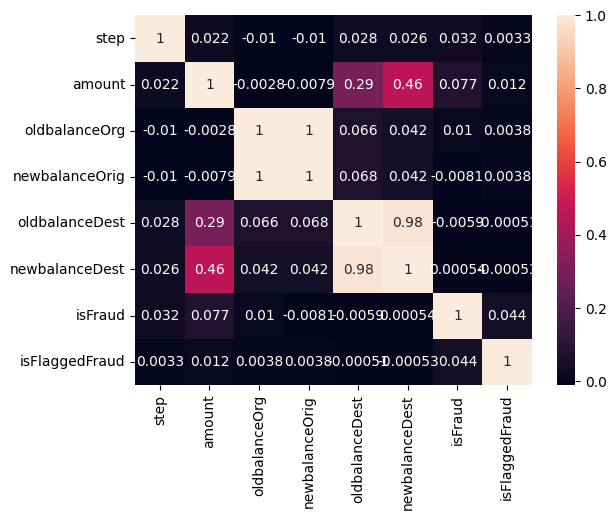

In [ ]:
# corelation between features of dataset
df.corr()
sns.heatmap(df.corr(),annot=True)

In [ ]:
# checking unique values in 'type' column and count of those
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [52]:
# independent variable
# dropping the columns which are not required
x=df.drop(['nameOrig','nameDest','isFlaggedFraud','step','isFraud'],axis=1)

# independent variable
y=df['isFraud']
# 'isFraud' is our response column

In [53]:
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [54]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [55]:
# to convert categorical data into numerical
# creating dummies for the 'type' column
x= pd.get_dummies(x, columns=['type'])
x.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [56]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
x_train.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1657090,99986.73,7845.07,0.00,914025.09,1014011.83,0,1,0,0,0
3056545,62405.63,16603.00,0.00,466525.55,528931.18,0,1,0,0,0
224722,2291393.07,0.00,0.00,3729395.93,6020789.00,0,0,0,0,1
495935,14173.77,11447430.20,11461603.97,3047711.43,3033537.66,1,0,0,0,0
4412383,301264.36,0.00,0.00,806211.40,1107475.76,0,1,0,0,0


In [58]:
y_train.head()

1657090    0
3056545    0
224722     0
495935     0
4412383    0
Name: isFraud, dtype: int64

In [59]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train

array([[-0.13216372, -0.28616688, -0.29259587, ..., -0.08081988,
        -0.71453382, -0.30230521],
       [-0.19426813, -0.28313912, -0.29259587, ..., -0.08081988,
        -0.71453382, -0.30230521],
       [ 3.48923092, -0.28887904, -0.29259587, ..., -0.08081988,
        -0.71453382,  3.30791515],
       ...,
       [-0.16545621,  3.22114814,  3.20165576, ..., -0.08081988,
        -0.71453382, -0.30230521],
       [ 0.6422476 ,  0.0851109 ,  0.2709735 , ..., -0.08081988,
        -0.71453382, -0.30230521],
       [-0.05317965, -0.28747578, -0.24074564, ..., -0.08081988,
        -0.71453382, -0.30230521]])

In [ ]:
y_train

1657090    0
3056545    0
224722     0
495935     0
4412383    0
          ..
2249467    0
5157699    0
2215104    0
1484405    0
4500015    0
Name: isFraud, Length: 5090096, dtype: int64

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred_lr = model.predict(x_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
classification_report(y_pred_lr,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   1272121\n           1       0.23      0.94      0.37       403\n\n    accuracy                           1.00   1272524\n   macro avg       0.62      0.97      0.69   1272524\nweighted avg       1.00      1.00      1.00   1272524\n'

In [63]:
print(confusion_matrix(y_pred_lr,y_test))

[[1270860    1261]
 [     23     380]]


In [64]:
print(accuracy_score(y_pred_lr,y_test))  # accuracy of logistic regression model

0.9989909817025062


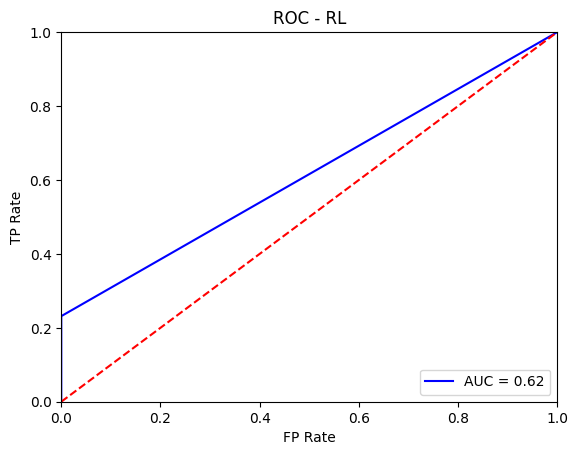

In [66]:
import sklearn.metrics as metrics

fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred_lr)
roc_auc = metrics.auc(fpr,tpr)

plt.title('ROC - RL')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [67]:
y_pred_dt = model1.predict(x_test)

In [68]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272121
           1       0.23      0.94      0.37       403

    accuracy                           1.00   1272524
   macro avg       0.62      0.97      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524



In [69]:
print(confusion_matrix(y_pred_dt,y_test))

[[1270860    1261]
 [     23     380]]


In [70]:
print(accuracy_score(y_pred_dt,y_test))

0.9989909817025062


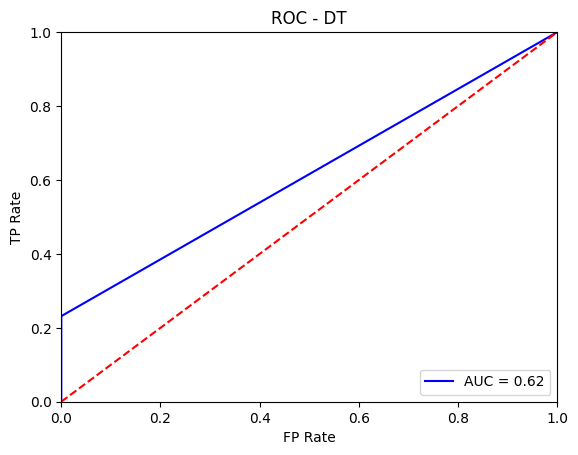

In [71]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred_dt)
roc_auc = metrics.auc(fpr,tpr)

plt.title('ROC - DT')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

**KNN**

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model2= KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred = model2.predict(x_test)

In [48]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271221
           1       0.73      0.92      0.81      1303

    accuracy                           1.00   1272524
   macro avg       0.86      0.96      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [49]:
print(confusion_matrix(y_pred,y_test))

[[1270776     445]
 [    107    1196]]


In [50]:
print(accuracy_score(y_pred,y_test))

0.9995662164328531


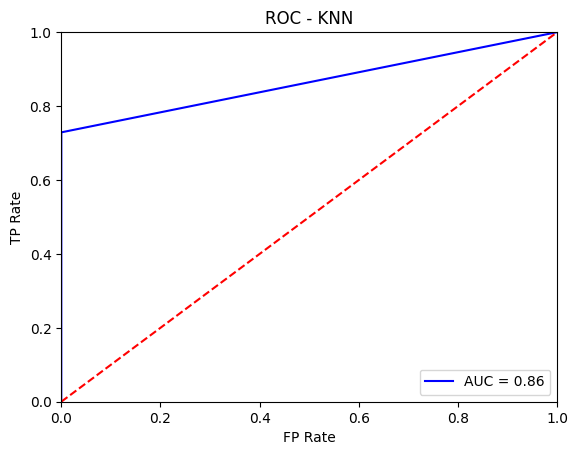

In [72]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)

plt.title('ROC - KNN')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

**Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
model3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [74]:
y_pred_rf = model3.predict(x_test)

In [75]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272254
           1       0.16      1.00      0.28       270

    accuracy                           1.00   1272524
   macro avg       0.58      1.00      0.64   1272524
weighted avg       1.00      1.00      1.00   1272524



In [76]:
print(confusion_matrix(y_pred_rf,y_test))

[[1270883    1371]
 [      0     270]]


In [77]:
print(accuracy_score(y_pred_rf,y_test))

0.9989226136402929


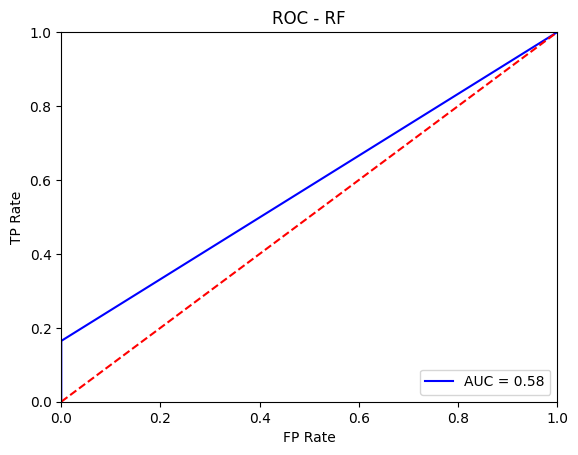

In [80]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred_rf)
roc_auc = metrics.auc(fpr,tpr)

plt.title('ROC - RF')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()